In [1]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")

# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


한글 폰트 설정이 완료되었습니다.
데이터 로드 및 통합이 완료되었습니다.


In [ ]:
df.to_excel('merged_data.xlsx',index=False)

In [ ]:
# 문제 1: 카테고리별 월별 매출액 추이를 분석하고, 가장 성장률이 높은 카테고리를 식별하세요.
# 시각화: 라인 플롯

# 비즈니스 목적: 시간에 따른 카테고리별 성과를 파악하여 어떤 카테고리에 집중해야 할지 결정합니다.

카테고리별 평균 월별 성장률:
category
화장품      0.127811
가구       0.098994
식품       0.087353
의류       0.079554
도서       0.078011
스포츠용품    0.073715
전자제품     0.048982
dtype: float64


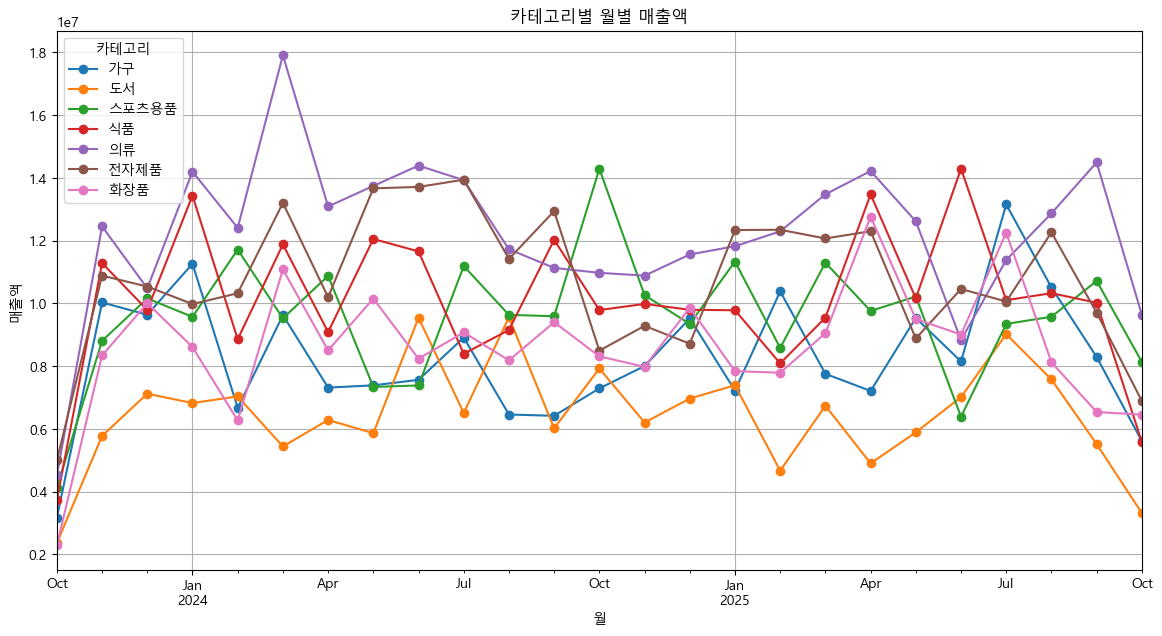

In [4]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 2: 고객별 재주문까지 걸리는 평균 시간을 분석하고, 가장 재구매 주기가 짧은 충성 고객 TOP 5를 찾으세요.
# 시각화: 바 차트

# 비즈니스 목적: 고객의 재구매 주기를 파악하여, 주기에 맞춘 리마인드 알림이나 프로모션을 통해 고객의 이탈을 방지하고 재구매를 유도합니다.

재구매 주기가 가장 짧은 고객 TOP 5 (일):
customer_id
C0473    1.0
C0204    4.0
C0940    5.0
C0401    5.0
C1892    5.0
Name: time_since_last_order, dtype: float64


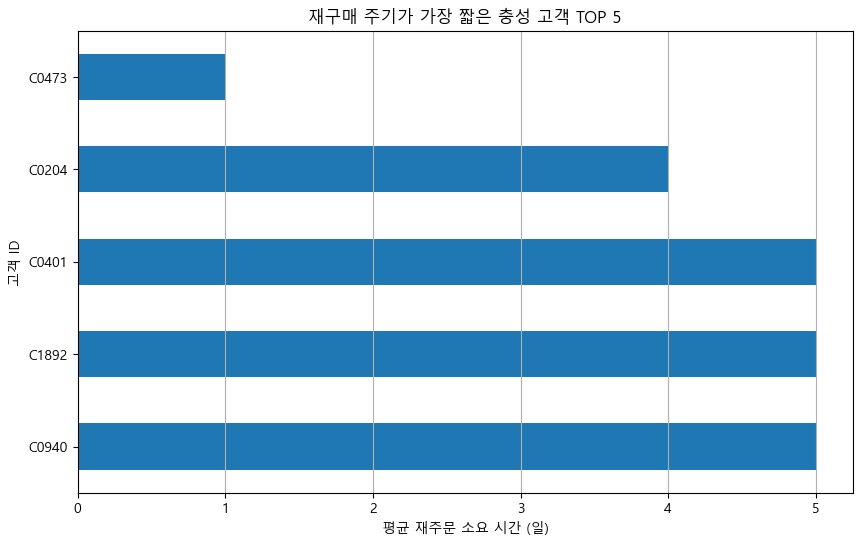

In [5]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 3: 재구매율이 가장 높은 상위 10개 상품을 찾으세요.
# 비즈니스 목적: 고객 충성도가 높은 상품을 파악하고, 해당 상품의 재고를 안정적으로 관리하거나 충성 고객 대상 마케팅에 활용합니다.

In [6]:
# 출력 결과를 보고 코딩하세요







재구매율 상위 10개 상품:
product_name
스포츠용품 상품_107    0.090909
가구 상품_2         0.066667
의류 상품_441       0.066667
스포츠용품 상품_498    0.062500
도서 상품_103       0.062500
화장품 상품_490      0.058824
화장품 상품_262      0.058824
의류 상품_265       0.058824
화장품 상품_422      0.055556
화장품 상품_8        0.055556
Name: customer_id, dtype: float64


In [ ]:
# 문제 4: 카테고리 내에서 각 상품의 매출액 순위를 계산하고, 카테고리별 상위 3개 상품을 확인하세요.
# 비즈니스 목적: 각 카테고리의 핵심 상품(Key Item)과 비주력 상품을 파악하여 상품 진열, 프로모션, 재고 관리에 활용합니다.

In [7]:
# 출력 결과를 보고 코딩하세요







카테고리별 매출 상위 3개 상품:
    category  product_name  total_sales  rank
4         가구     가구 상품_382      6860700   1.0
44        가구   전자제품 상품_273      6623000   2.0
57        가구    화장품 상품_323      6123000   3.0
70        도서     도서 상품_360      7355400   1.0
74        도서      도서 상품_83      6828800   2.0
112       도서     화장품 상품_82      6683000   3.0
141    스포츠용품   스포츠용품 상품_61      8710000   1.0
146    스포츠용품     식품 상품_173      7522900   2.0
151    스포츠용품     식품 상품_473      7260100   3.0
198       식품      가구 상품_46      9682200   1.0
216       식품  스포츠용품 상품_482      6859800   2.0
238       식품   전자제품 상품_280      6697500   3.0
344       의류   전자제품 상품_463      8091900   1.0
315       의류     식품 상품_396      7265700   2.0
347       의류    화장품 상품_224      6907500   3.0
377     전자제품     도서 상품_391      9197700   1.0
399     전자제품     의류 상품_145      8109000   2.0
413     전자제품   전자제품 상품_218      7281600   3.0
458      화장품  스포츠용품 상품_376      8261600   1.0
469      화장품     식품 상품_329      7087600   2.0
434      화장품   

In [ ]:
# 문제 5: 재고가 10개 미만으로 남은 상품 중, 최근 30일간 판매량이 가장 많았던 상품 5개를 찾아 긴급 재고 확보 우선순위를 정하세요.
# 비즈니스 목적: 품절로 인한 판매 기회 손실을 최소화하기 위해, 시급하게 재고를 확보해야 할 상품을 결정합니다.

In [8]:
# 출력 결과를 보고 코딩하세요







긴급 재고 확보 필요 상품 TOP 5:
product_name
식품 상품_125       9
화장품 상품_437      8
식품 상품_367       6
스포츠용품 상품_328    5
식품 상품_289       5
Name: quantity, dtype: int64


In [ ]:
# 문제 6: 월별 판매량 상위 10%에 속하는 상품들의 카테고리 분포 변화를 추적하세요.
# 시각화: 누적 영역 차트

# 비즈니스 목적: 시장 트렌드 변화를 파악하고, 어떤 종류의 상품들이 인기를 얻고 있는지 시간에 따른 변화를 관찰합니다.

C:\Users\USER\AppData\Local\Temp\ipykernel_26952\600857695.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_performers = monthly_top_products.groupby('order_month').apply(get_top_10_percent).reset_index(drop=True)


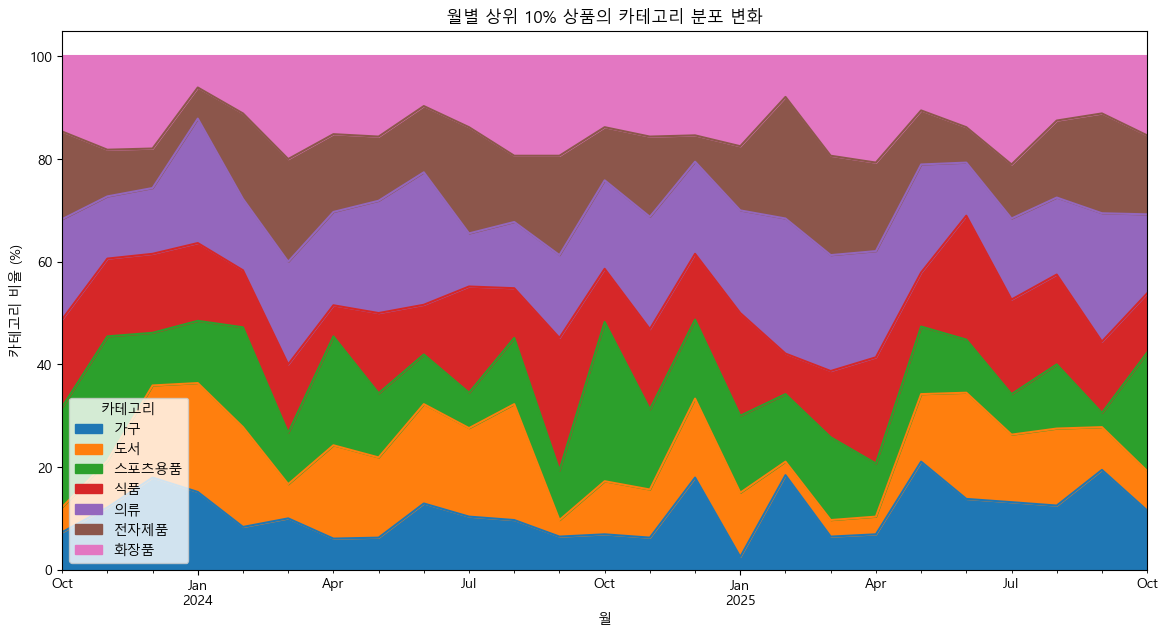

In [9]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 7: 고객의 첫 구매 상품과 두 번째 구매 상품 카테고리 간의 전환 패턴을 분석하세요.
# 시각화: 히트맵

# 비즈니스 목적: 고객의 구매 여정을 이해하고, 첫 구매 상품에 따라 다음 구매를 유도할 상품 추천 전략을 수립합니다.

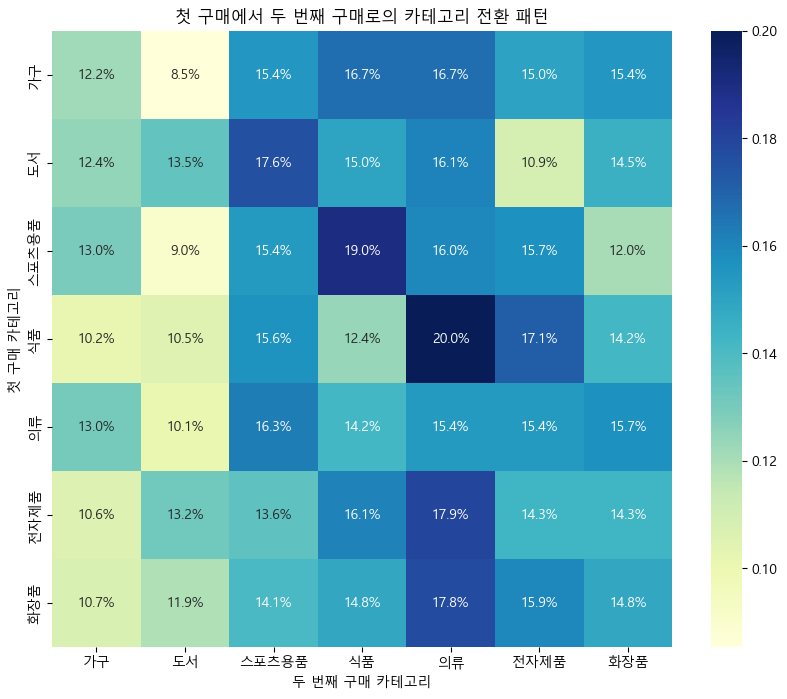

In [10]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 8: 주문이 가장 많이 발생하는 시간대와 해당 시간대에 가장 잘 팔리는 상품 카테고리를 분석하세요.
# 비즈니스 목적: 시간 기반 타겟 마케팅 전략(예: 점심시간 쿠폰, 퇴근길 푸시 알림)을 수립하는 데 활용합니다.

시간대별 가장 많이 팔리는 카테고리:
time_of_day
심야 (00-05)    식품
오전 (05-12)    의류
오후 (12-18)    의류
저녁 (18-24)    의류
dtype: object


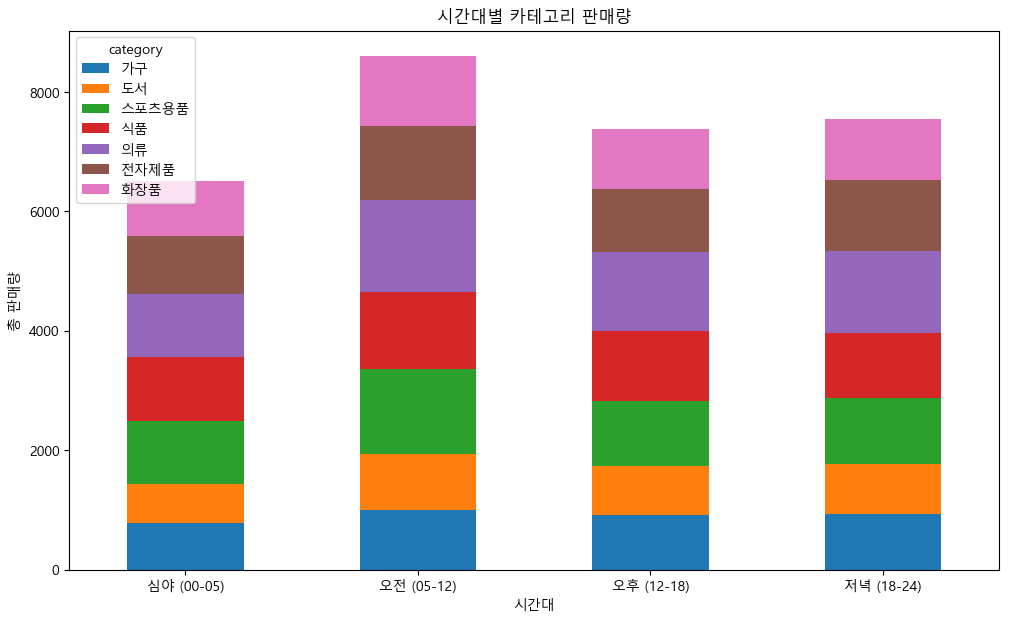

In [11]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 9: 신규 고객과 기존 고객이 주로 구매하는 상품 카테고리에 차이가 있는지 비교 분석하세요.
# 비즈니스 목적: 고객 유형에 따른 상품 추천 전략을 세우고, 신규 고객에게는 진입장벽이 낮은 상품을, 기존 고객에게는 새로운 카테고리의 상품을 제안하는 등의 전략을 구사합니다.

신규/기존 고객의 카테고리별 구매 비중 (%):
category              가구         도서      스포츠용품         식품         의류  \
customer_type                                                          
기존 고객          12.063351  10.832676  15.398855  15.539406  17.671660   
신규 고객          11.031175  11.870504  19.784173  12.709832  16.306954   

category            전자제품        화장품  
customer_type                        
기존 고객          14.668678  13.825375  
신규 고객          18.944844   9.352518  


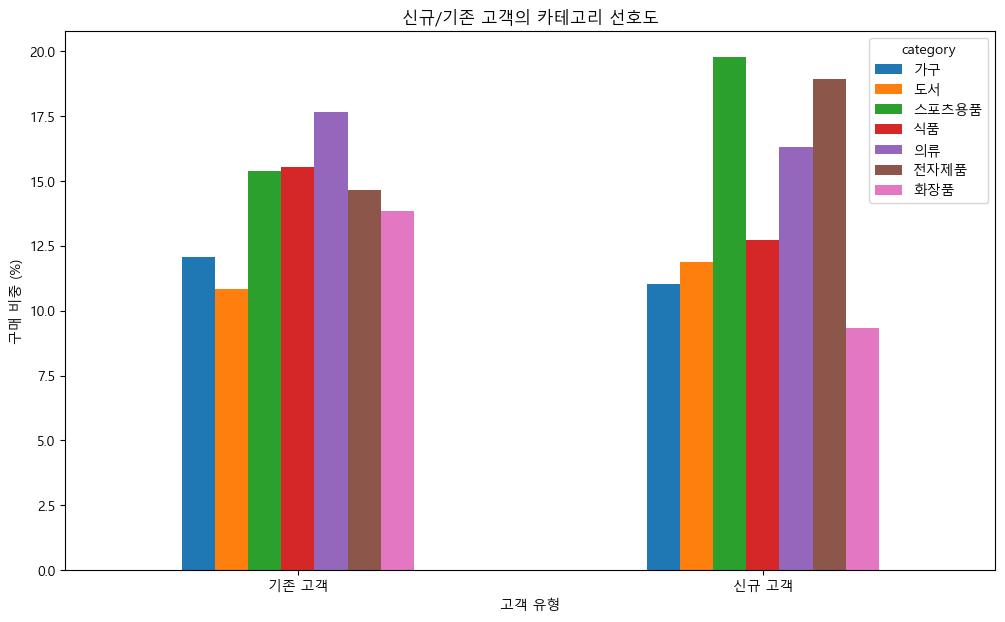

In [12]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 10: 주문 취소가 가장 빈번한 상품 상위 5개를 찾고, 이들 상품의 공통적인 특징을 분석하세요.
# 비즈니스 목적: 취소율이 높은 상품의 원인을 파악(예: 불충분한 상품 설명, 높은 가격)하여 운영 효율성을 개선하고 매출 손실을 줄입니다.

In [13]:
# 출력 결과를 보고 코딩하세요







주문 취소(결제 대기)가 잦은 상품 TOP 5:
product_name
화장품 상품_160     5
스포츠용품 상품_6     4
화장품 상품_256     4
전자제품 상품_159    4
의류 상품_132      4
Name: count, dtype: int64

해당 상품들의 특징:
             category  avg_price  avg_stock
product_name                               
스포츠용품 상품_6        화장품    74300.0        2.0
의류 상품_132          식품     6600.0       39.0
전자제품 상품_159        식품    57500.0       32.0
화장품 상품_160      스포츠용품    51600.0        5.0
화장품 상품_256         도서    16500.0       24.0


In [ ]:
# 문제 11: 상품명에 특정 키워드가 포함된 상품들의 평균 가격과 다른 상품들의 평균 가격을 비교하세요.
# - 특정 키워드 : '스포츠용품'
# 비즈니스 목적: 상품 네이밍 전략이 가격 책정에 미치는 영향을 간접적으로 분석하고, 프리미엄 라인업 등의 키워드 전략을 평가합니다.

In [14]:
# 출력 결과를 보고 코딩하세요







'스포츠용품' 포함 상품 평균 가격: 56,466원
그 외 상품 평균 가격: 54,679원


In [ ]:
# 문제 12: 월별 매출액과 해당 월의 신규 상품 출시 수 간의 상관관계를 분석하세요.
# 비즈니스 목적: 신상품 출시라는 비즈니스 활동이 매출 성과에 얼마나 긍정적인 영향을 미치는지 정량적으로 파악합니다.

In [15]:
# 출력 결과를 보고 코딩하세요







월별 매출액과 신규 상품 출시 수 간의 상관관계:
              total_sales  new_products
total_sales      1.000000      0.916278
new_products     0.916278      1.000000
